In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df = pd.read_csv("./tips.csv")

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


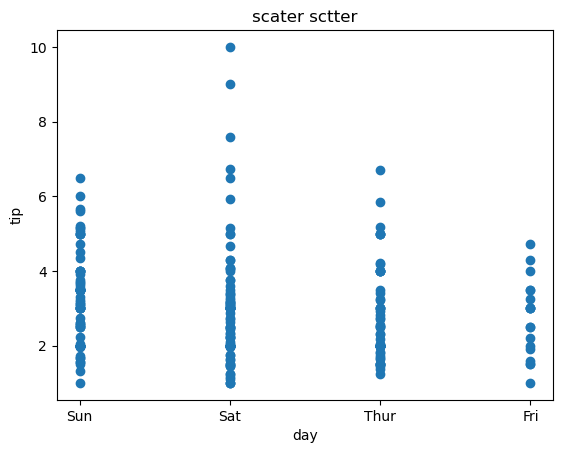

In [3]:
plt.scatter(x = df.day, y=df.tip)

plt.title("scater sctter")

plt.xlabel("day")
plt.ylabel("tip")

plt.show()

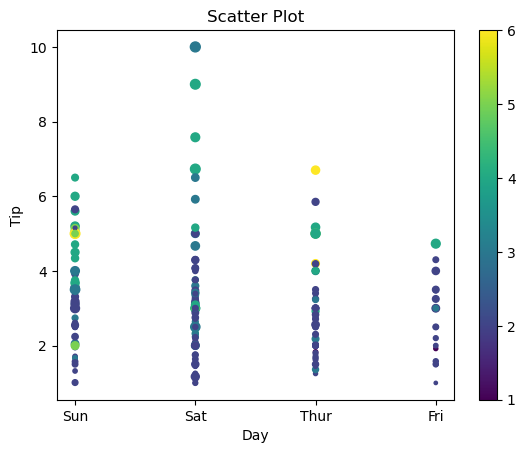

In [4]:
plt.scatter(df['day'], df['tip'], c=df['size'], 
            s=df['total_bill'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('Day')
plt.ylabel('Tip')
 
plt.colorbar()
 
plt.show()


Text(0, 0.5, 'Tip')

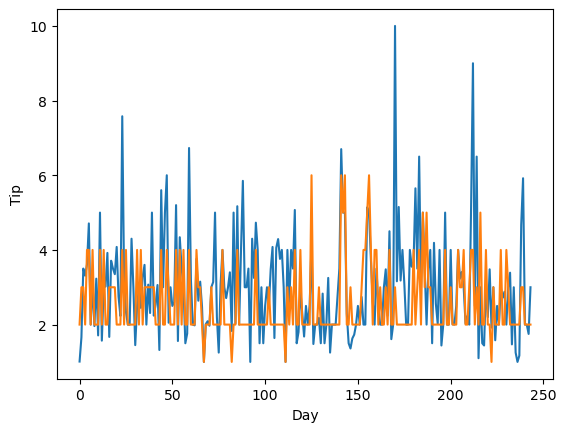

In [5]:
plt.plot(df['tip'])
plt.plot(df['size'])

plt.xlabel('Day')
plt.ylabel('Tip')


<BarContainer object of 244 artists>

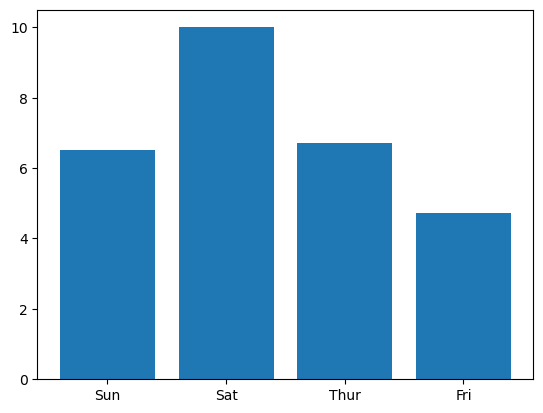

In [6]:
plt.bar(df['day'], df['tip'])

Text(0.5, 1.0, 'Histogram')

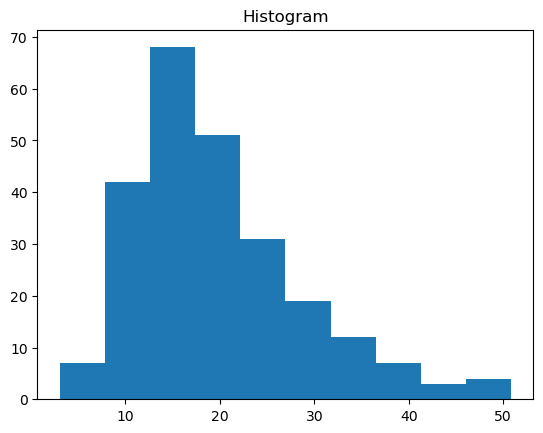

In [7]:
plt.hist(df['total_bill'])
 
plt.title("Histogram")


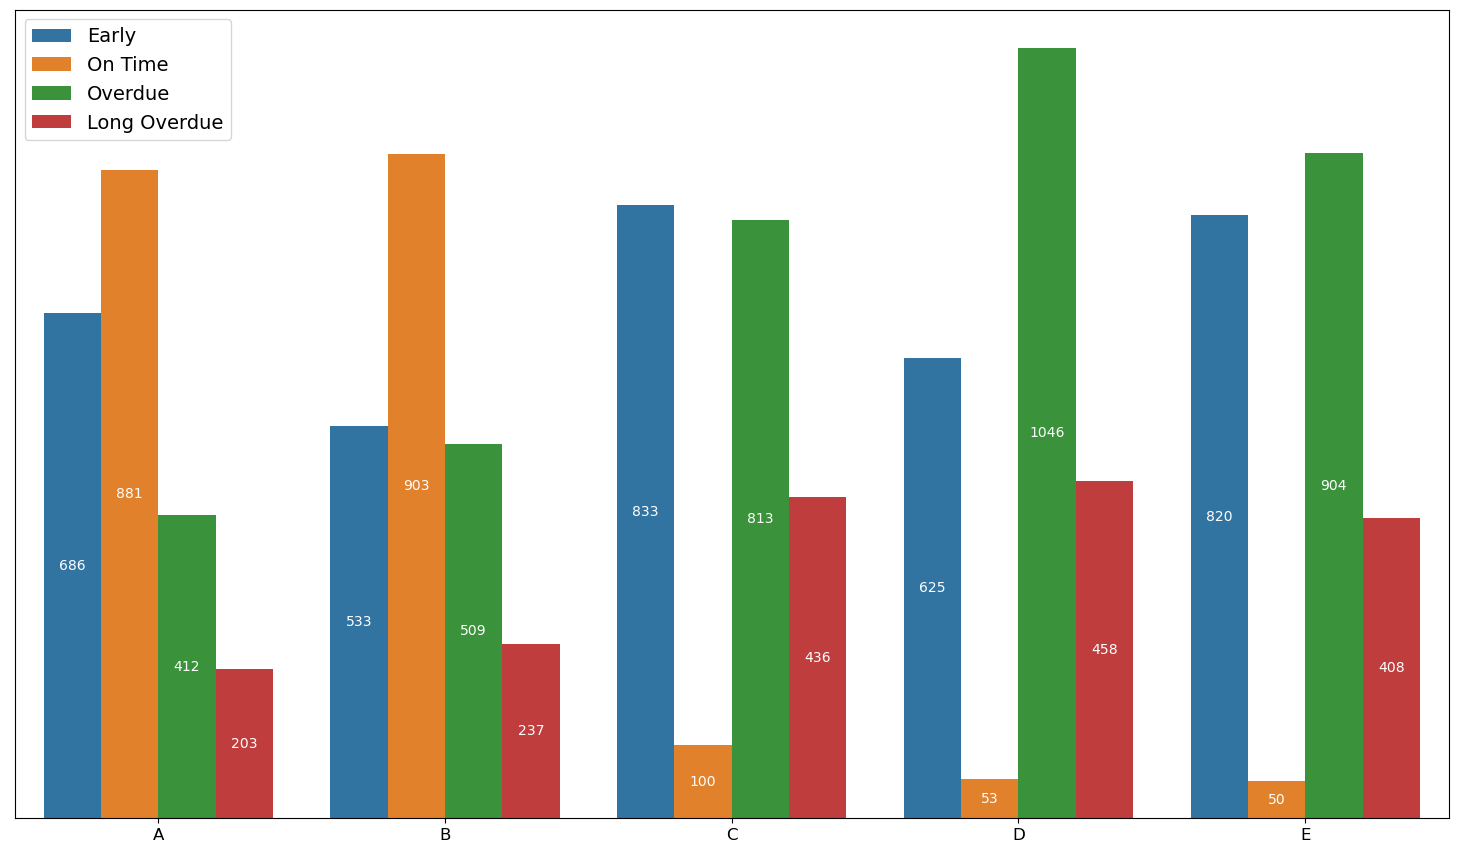

In [8]:
df = pd.DataFrame({'Early': {'A': 686, 'B': 533, 'C': 833, 'D': 625, 'E': 820},
 'Long Overdue': {'A': 203, 'B': 237, 'C': 436, 'D': 458, 'E': 408},
 'On Time': {'A': 881, 'B': 903, 'C': 100, 'D': 53, 'E': 50},
 'Overdue': {'A': 412, 'B': 509, 'C': 813, 'D': 1046, 'E': 904}})

df_long = df.unstack().to_frame(name='value')
df_long = df_long.swaplevel()
df_long.reset_index(inplace=True)
df_long.columns = ['group', 'status', 'value']
df_long['status'] = pd.Categorical(df_long['status'], ["Early", "On Time", "Overdue", "Long Overdue"])
df_long = df_long.sort_values("status")

fig, ax = plt.subplots(figsize=(18.5, 10.5))

g = sns.barplot(data=df_long, x='group', y='value', hue='status', ax=ax)

for bar in g.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., 0.5 * height, int(height),
                ha='center', va='center', color='white')
plt.xticks(fontsize=12)
plt.legend(loc='upper left', prop={'size': 14})

ax.xaxis.label.set_visible(False)
ax.axes.get_yaxis().set_visible(False)
plt.show()


C:\Users\amalv\anaconda3\jupyter\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


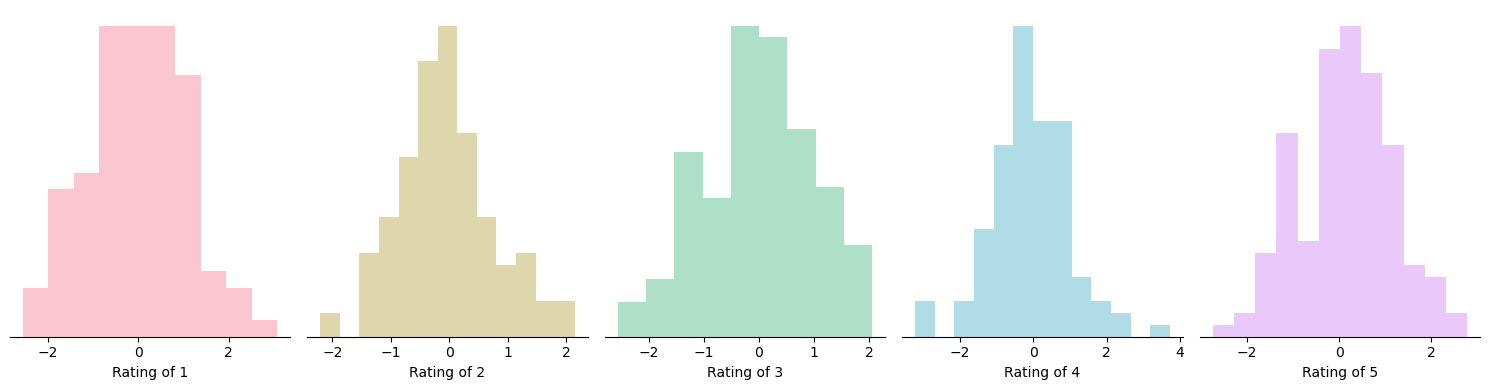

In [9]:
df = pd.DataFrame({"cost" : np.random.randn(600),
                   "rating" : np.random.choice(np.arange(1,6), size=600)})

ratings = np.unique(df.rating.values)
palette = iter(sns.husl_palette(len(ratings)))

f, axes = plt.subplots(ncols=len(ratings), figsize=(15, 4))
sns.despine(left=True)

for (n, rat), ax in zip(df.groupby("rating"), axes):

    sns.distplot(rat["cost"], kde=False, color=next(palette), ax=ax, axlabel=f"Rating of {n}")

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()


In [12]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

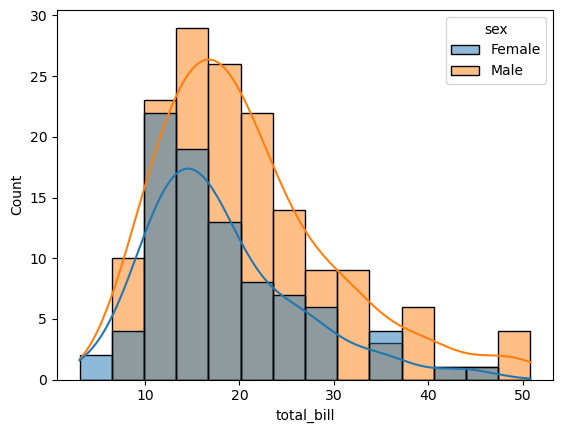

In [16]:
sns.histplot(data=df, x = 'total_bill', hue='sex', kde=True)